# Exercises for Introduction to Quantum Computing

Name: Pugazharasu Anancia Devaneyan (s6puanan) <br />
Matriculation number: 3300280

In [11]:
#Importing the required libraries
import matplotlib.pyplot as plt
import math
import numpy as np
from math import pi
import qiskit as qi
from qiskit import IBMQ, BasicAer, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
from scipy import signal

# 1 Quantum Simulation on Quantum Hardware

a) We know from sheet 8 that,
$$e^{i k \sigma_{n}} =  \mathbb{I} \cdot \cos (k)+i \sigma_{n} \cdot \sin (k)$$ 
Given the Hamiltonian,
$$H=X_0 \otimes Y_1$$
the unitary representing this time evolution for a small timestep $\delta t$ is given by,
$$U = e^{- i \delta t H}$$
$$U = e^{- i \delta t X_{0}} \otimes e^{- i \delta t Y_{1}}$$
$$U =  \left [ \mathbb{I} \cdot \cos (\delta t) - i X_0 \cdot \sin (\delta t) \right ]  \otimes \left [\mathbb{I} \cdot \cos (\delta t) -i Y_1 \cdot \sin (\delta t) \right ]$$
writing this out as matrix elements, we have:
$$U = \begin{pmatrix}\cos (\delta t) & - i\sin (\delta t) \\ - i \sin (\delta t) &  \cos (\delta t) \end{pmatrix} \otimes \begin{pmatrix} \cos (\delta t) & -\sin (\delta t) \\ \sin (\delta t) & \cos (\delta t)\end{pmatrix} $$
This resembles the $X$ and $Y$ rotation gates, which are of the form,
$$R_{X}(\theta)=\exp \left(-i \frac{\theta}{2} X\right) = \begin{pmatrix} \cos(\frac{\theta}{2}) & -i\sin(\frac{\theta}{2}) \\ -i\sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2}) \end{pmatrix}$$
$$R_{Y}(\theta)=\exp \left(-i \frac{\theta}{2} Y\right) = \begin{pmatrix} \cos(\frac{\theta}{2}) & -\sin(\frac{\theta}{2}) \\ \sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2}) \end{pmatrix}$$
Thus, our quantum circuit to implement the Hamiltonian is simply given by the unitary,
$$U = R_{X}(\theta) \otimes R_{Y} (\theta)$$
where, $ \theta = 2 \times \delta t$

b) We will now implement a quantum circuit on Qiskit for the Hamiltonian from (a)

In [37]:
def hammy(t):
    t *= 2
    qc = QuantumCircuit(2,2)
    qc.rx(t,0)
    qc.ry(t,1)
    #qc.measure(0,0)
    #qc.measure(1,1)
    return qc

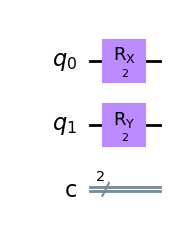

In [38]:
delta_t = 1
circuit = hammy(delta_t)
circuit.draw('mpl')

If we have the initial state,
$$|\psi(0)\rangle=|00\rangle$$

In [35]:
state = qi.quantum_info.Statevector.from_label('00')
state.draw(output='latex')

<IPython.core.display.Latex object>

we have the final state,

In [46]:
state = state.evolve(circuit)
state.draw(output='latex')

<IPython.core.display.Latex object>

Let's now simulate this using the 'statevector_simulator' in Qiskit

In [45]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(circuit, backend)
result = job.result()

state_vector = result.get_statevector()
data = result.data()
#psi1 = data[0]
#psi2 = data['psi2']
print(data)
#display(state_vector.draw(output = 'latex'))
#display(psi2.draw(output = 'latex'))
# Print the statevector
print(state_vector)

{'counts': {'0x0': 1}, 'statevector': array([2.91926582e-01+0.j        , 2.78392046e-17-0.45464871j,
       4.54648713e-01+0.j        , 4.33569923e-17-0.70807342j])}
[2.91926582e-01+0.j         2.78392046e-17-0.45464871j
 4.54648713e-01+0.j         4.33569923e-17-0.70807342j]


In [34]:
shots = 1000
sim_statevector = Aer.get_backend('aer_simulator_statevector')
job_statevector = sim_statevector.run(circuit, shots=shots)
counts_statevector = job_statevector.result()#.get_counts()
#plot_histogram(counts_statevector)
print(counts_statevector)

Result(backend_name='aer_simulator_statevector', backend_version='0.12.0', qobj_id='', job_id='659e1a72-4a6d-4894-9466-cc10997578ac', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 522, '0x0': 96, '0x2': 184, '0x1': 198}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata=None, n_qubits=2, name='circuit-125', qreg_sizes=[['q', 2]]), status=DONE, seed_simulator=1431322735, metadata={'batched_shots_optimization': False, 'method': 'statevector', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'sample_measure_time': 0.0005768, 'input_qubit_map': [[0, 0], [1, 1]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'fusion': {'enabled': True, 'threshold': 14, 'max_fused_qubits': 5, 'applied': False}}, time_taken=0.0036944)], date=2023-06-25T17:57:22.326488, status=COMPLETED, 

c) We will now attempt to do the same computation in (b) but in a real, noisy quantum computer!

In [ ]:
from qiskit_ibm_provider import IBMProvider
IBMProvider.save_account(token=MY_API_TOKEN)

In [ ]:
provider = IBMProvider()
device_list = provider.backends()
for dev in device_list:
    print(dev.name + ':_' + str(dev.configuration().n_qubits) + '_qubits')

In [ ]:
num_shots_hardware = 1024
hardware_backend = provider.get_backend('ibmq_quito')
job = execute(qc,backend=hardware_backend , shots=num_shots_hardware )

We can also use a classical simulator which can simulate the nosie on a quantum device in order to do this computation.

In [ ]:
from qiskit.providers.fake_provider import FakeQuitoV2
hardware_backend = FakeQuitoV2()
job = execute(qc, backend=hardware_backend, shots = num_shots_hardware)

# 2 Pauli Measurements

a)

b)

In [5]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

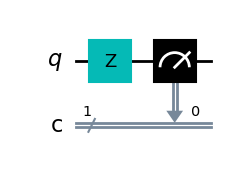

In [6]:
evo = QuantumCircuit(1,1)
evo.z(0)
evo.measure(0,0)
evo.draw('mpl')

In [8]:
shots = 1000
sim_statevector = Aer.get_backend('aer_simulator_statevector')
job_statevector = sim_statevector.run(evo, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)
print(counts_statevector)

{'0': 1000}


In [ ]:
state = qi.quantum_info.Statevector.from_label('1')
state.draw(output='latex')